# 2.	Perform clustering for the crime data and identify the number of clusters            formed and draw inferences. Refer to crime_data.csv dataset.

In [6]:


import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize

<ipython-input-6-9c26bfea5de3>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float, array


In [26]:
df = pd.read_csv(r"C:\Users\ali umar hasan\Desktop\data science\Dataset_Assignment Clustering\crime_data.csv")

In [28]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [29]:
def norm_func(i):   #crearing a normalization function 
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
df_norm = norm_func(df.iloc[:,1:])  #scaled features as per normalization
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [32]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for dendrogram purpose

In [33]:
z = linkage(df_norm, method="complete",metric="euclidean")

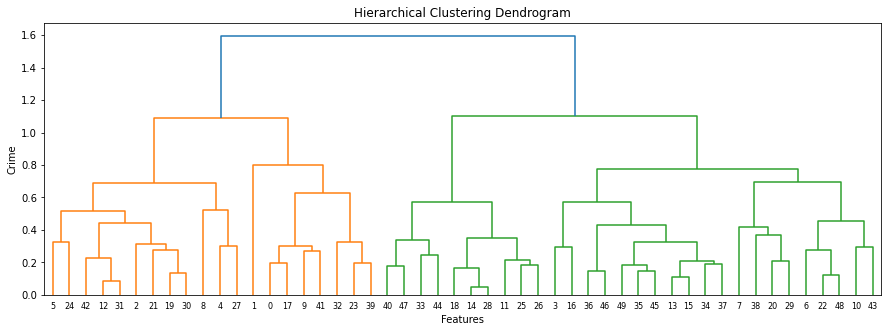

In [34]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [35]:
# elbow curve 
k = list(range(2,15))


In [36]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [37]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

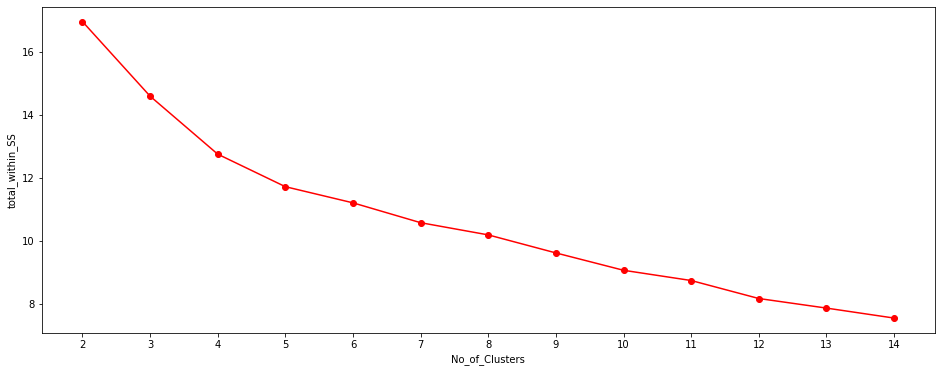

In [40]:
plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()

In [41]:
# just selecting 4 clusters from the above elbow curve
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [43]:
model.labels_ # getting the labels of clusters assigned to each row 

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [44]:
model.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [45]:
import seaborn as sns

In [47]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [50]:
stats =df.sort_values("Murder", ascending=True).head(10)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,2
28,New Hampshire,2.1,57,56,9.5,2
18,Maine,2.1,83,51,7.8,2
14,Iowa,2.2,56,57,11.3,2
44,Vermont,2.2,48,32,11.2,2
48,Wisconsin,2.6,53,66,10.8,2
11,Idaho,2.6,120,54,14.2,0
22,Minnesota,2.7,72,66,14.9,2
43,Utah,3.2,120,80,22.9,0
6,Connecticut,3.3,110,77,11.1,0


C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


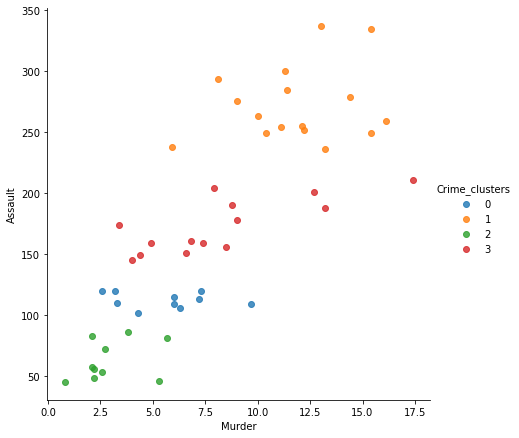

In [53]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


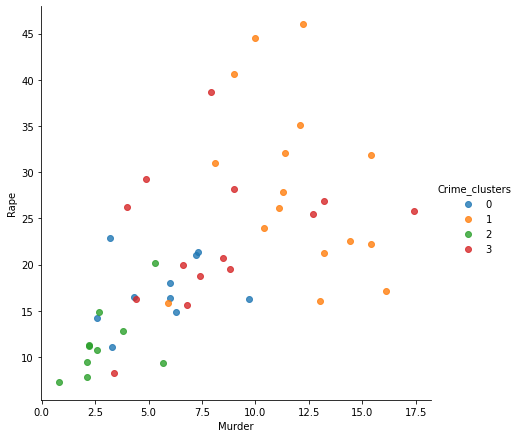

In [56]:
 #Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


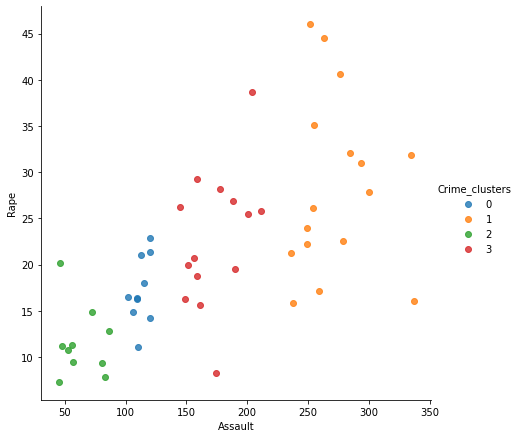

In [59]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );